###I. Data Preprocessing

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import dataset
dataset= pd.read_csv("/content/sample_data/Data (1).csv")
display(dataset)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
# take care of missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="mean")
x[:,1:3]=imputer.fit_transform(x[:,1:3])
print(pd.DataFrame(x))

# KNNImputer- another method

         0        1        2
0   France       44    72000
1    Spain       27    48000
2  Germany       30    54000
3    Spain       38    61000
4  Germany       40  63777.8
5   France       35    58000
6    Spain  38.7778    52000
7   France       48    79000
8  Germany       50    83000
9   France       37    67000


In [ ]:
# label encoding on Purchased column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y=le.fit_transform(y)
display(y)


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# one hot encoding of Country(categorical data)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# (name,..., column where to apply)
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x= pd.DataFrame(ct.fit_transform(x))
# dataset[["Country"]]=onehoten.fit_transform(dataset[["Country"]])
display(x)

,0,1,2,3,4
0,1,0,0,44,72000
1,0,0,1,27,48000
2,0,1,0,30,54000
3,0,0,1,38,61000
4,0,1,0,40,63777.8
5,1,0,0,35,58000
6,0,0,1,38.7778,52000
7,1,0,0,48,79000
8,0,1,0,50,83000
9,1,0,0,37,67000


In [ ]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.iloc[:, 3:5] = sc.fit_transform(x.iloc[:, 3:5])
print(x)

   0  1  2            3            4
0  1  0  0     0.758874     0.749473
1  0  0  1      -1.7115     -1.43818
2  0  1  0     -1.27555    -0.891265
3  0  0  1    -0.113024      -0.2532
4  0  1  0     0.177609  2.35783e-16
5  1  0  0    -0.548973    -0.526657
6  0  0  1  1.11022e-16     -1.07357
7  1  0  0      1.34014      1.38754
8  0  1  0      1.63077      1.75215
9  1  0  0     -0.25834     0.293712


In [ ]:
new_df=pd.concat([x,pd.DataFrame(y)], axis=1)
new_df.columns=["France","Germany", "Spain", "Age","Salary","Purchased"]
display(new_df)


,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,0.758874,0.749473,0
1,0,0,1,-1.7115,-1.43818,1
2,0,1,0,-1.27555,-0.891265,0
3,0,0,1,-0.113024,-0.2532,0
4,0,1,0,0.177609,2.35783e-16,1
5,1,0,0,-0.548973,-0.526657,1
6,0,0,1,1.11022e-16,-1.07357,0
7,1,0,0,1.34014,1.38754,1
8,0,1,0,1.63077,1.75215,0
9,1,0,0,-0.25834,0.293712,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

   0  1  2         3            4
4  0  1  0  0.177609  2.35783e-16
0  1  0  0  0.758874     0.749473
3  0  0  1 -0.113024      -0.2532
1  0  0  1   -1.7115     -1.43818
7  1  0  0   1.34014      1.38754
8  0  1  0   1.63077      1.75215
5  1  0  0 -0.548973    -0.526657
   0  1  2            3         4
2  0  1  0     -1.27555 -0.891265
9  1  0  0     -0.25834  0.293712
6  0  0  1  1.11022e-16  -1.07357
[1 0 0 1 1 0 1]
[0 1 0]


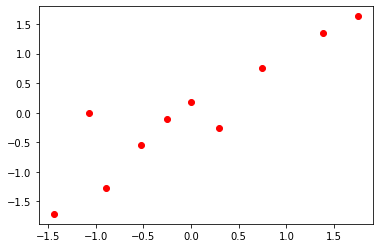

In [ ]:
plt.scatter(new_df["Salary"], new_df["Age"], color="Red")

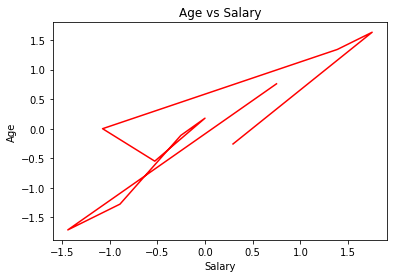

In [ ]:
plt.plot(new_df["Salary"], new_df["Age"], color="Red")
plt.title("Age vs Salary")
plt.xlabel("Salary")
plt.ylabel("Age")
plt.show()